In [6]:
from clustering_script import *

In [ ]:
import pandas as pd
graph_params = pd.read_excel(fr'C:\Users\Kinga\Desktop\MAGISTERKA\Geometric-Properties-of-Graph-Visualization-Methods\code\params\25_graph_params.xlsx')


In [95]:
params = graph_params.iloc[12]
params = tuple(params)
params

(12.0, 25.0, 4.0, 0.4, 0.03)

0.8187332322407552


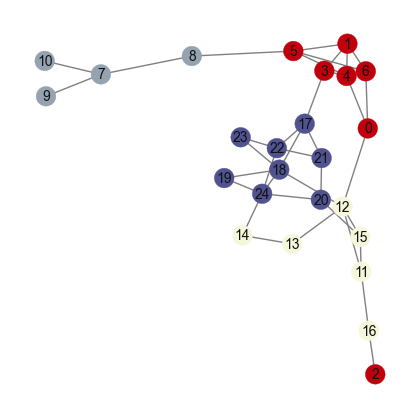

In [96]:
(graph_id, n_vertex, n_comms, inside_prob, outside_prob) = params
n_vertex = int(n_vertex)
n_comms = int(n_comms)
# (G, true_labels)= generate_G(sizes, inside_prob, outside_prob)

#! dont uncomment this
(G2, true_labels2) = generate_G_randomized(n_vertex, n_comms, inside_prob, outside_prob)
asor = nx.numeric_assortativity_coefficient(G2, "community")
print(asor)
# df = full_cluster_experiment(G, true_labels)
pos = nx.spring_layout(G2)
posdf = pd.DataFrame.from_dict(pos, orient='index', columns=['X', 'Y'])
plt.figure(figsize=(4,4))
# pos =nx.spring_layout(G)
nx.draw(G2, pos=pos, with_labels=True, node_color=true_labels2, cmap=mammalian_sighting_reflex , edge_color='gray', node_size=200, font_size=10)
# nx.draw(G, node_color=true_labels, cmap=plt.cm.Set3, with_labels=True, node_size=200)


In [97]:

# posdf = posdf_from_layout(G, 'spring')
best_num = best_number_of_clusters(G2)
best_num

5

# example 1

In [102]:
params = graph_params.iloc[17]
params = tuple(params)
params

(17.0, 25.0, 4.0, 0.35, 0.02)

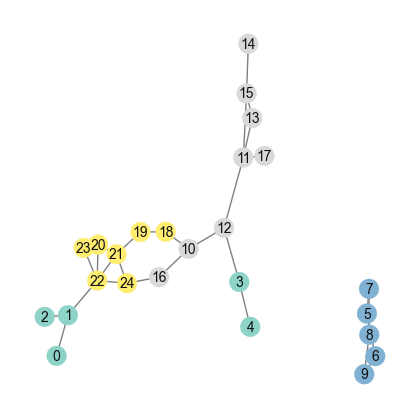

In [ ]:
(graph_id, n_vertex, n_comms, inside_prob, outside_prob) = params
n_vertex = int(n_vertex)
n_comms = int(n_comms)
# (G, true_labels)= generate_G(sizes, inside_prob, outside_prob)

#! dont uncomment this
# (G, true_labels) = generate_G_randomized(n_vertex, n_comms, inside_prob, outside_prob)
asor = nx.numeric_assortativity_coefficient(G, "community")
# df = full_cluster_experiment(G, true_labels)
pos = nx.spring_layout(G)
posdf = pd.DataFrame.from_dict(pos, orient='index', columns=['X', 'Y'])
plt.figure(figsize=(4,4))
# pos =nx.spring_layout(G)
nx.draw(G, pos=pos, with_labels=True, node_color=true_labels, cmap=plt.cm.Set3, edge_color='gray', node_size=200, font_size=10)
# nx.draw(G, node_color=true_labels, cmap=plt.cm.Set3, with_labels=True, node_size=200)


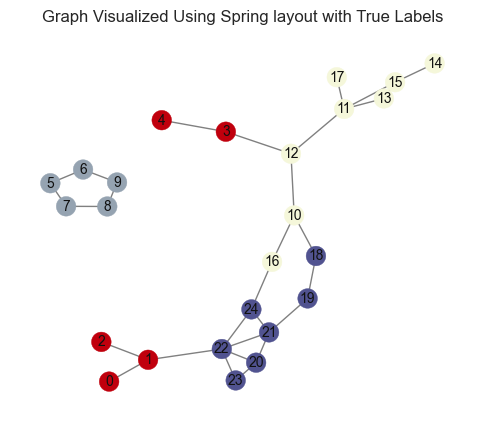

In [236]:
pos = nx.spring_layout(G)
posdf = pd.DataFrame.from_dict(pos, orient='index', columns=['X', 'Y'])

plt.figure(figsize=(6,5))
plt.title(f"Graph Visualized Using Spring layout with True Labels")

nx.draw(G, pos=pos, with_labels=True, node_color=true_labels, cmap=mammalian_sighting_reflex , edge_color='gray', node_size=200, font_size=10)


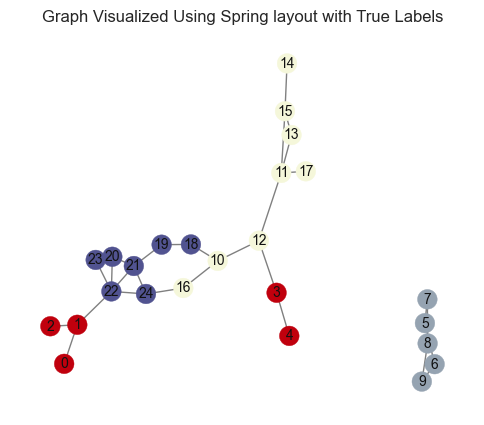

In [71]:
plt.figure(figsize=(6,5))
plt.title(f"Graph Visualized Using Spring layout with True Labels")

nx.draw(G, pos=pos, with_labels=True, node_color=true_labels, cmap=mammalian_sighting_reflex , edge_color='gray', node_size=200, font_size=10)


In [48]:

# posdf = posdf_from_layout(G, 'spring')
best_num = best_number_of_clusters(G)
best_num

4

In [237]:
asor = nx.numeric_assortativity_coefficient(G, "community")
asor

0.7602645356847617

In [238]:
best_num=4

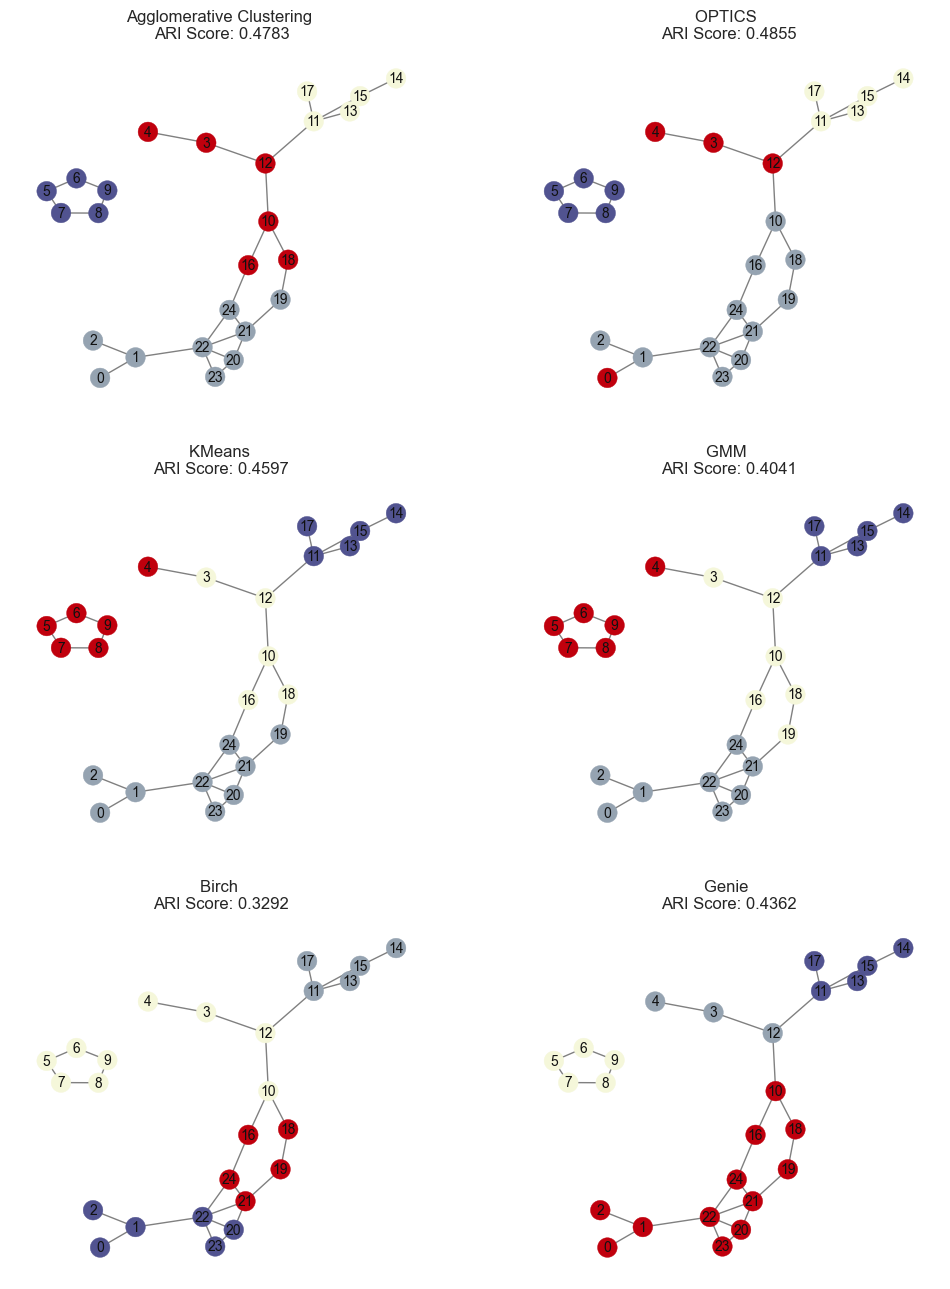

In [239]:
mammalian_sighting_reflex = ['#C0000D','#95A3B1','#F5F7DA', '#515390']
from matplotlib.colors import ListedColormap
mammalian_sighting_reflex = ListedColormap(mammalian_sighting_reflex)
# def get_clustering_from_positions(posdf, best_num, true_labels)->dict:
fig, axes = plt.subplots(3, 2, figsize=(12, 16))
axes = axes.flatten()

#agglomerative clustering
ari_scores = {}
model = AgglomerativeClustering(n_clusters=best_num)
model.fit(posdf)
yhat = list(model.labels_)
ari_scores['AgglomerativeClustering'] = adjusted_rand_score(true_labels, yhat)
# Visualization
idx=0
ax = axes[idx]
ax.set_title(f"Agglomerative Clustering \nARI Score: {ari_scores['AgglomerativeClustering']:.4f}")
nx.draw(G, pos=pos, with_labels=True, node_color=yhat, cmap=mammalian_sighting_reflex, 
        edge_color='gray', node_size=200, font_size=10, ax=ax)


#DBscan
model = OPTICS()
model.fit(posdf)
yhat= list(model.labels_)
ari_scores['OPTICS'] = adjusted_rand_score(true_labels, yhat)

idx=1
ax = axes[idx]
ax.set_title(f"OPTICS \nARI Score: {ari_scores['OPTICS']:.4f}")
nx.draw(G, pos=pos, with_labels=True, node_color=yhat, cmap=mammalian_sighting_reflex, 
        edge_color='gray', node_size=200, font_size=10, ax=ax)

    # kmeans
model = KMeans(n_clusters=best_num, random_state=212)
# try:
model.fit(posdf)
yhat = list(model.predict(posdf))
ari_scores['KMeans'] = adjusted_rand_score(true_labels, yhat)

idx=2
ax = axes[idx]
ax.set_title(f"KMeans \nARI Score: {ari_scores['KMeans']:.4f}")
nx.draw(G, pos=pos, with_labels=True, node_color=yhat, cmap=mammalian_sighting_reflex, 
        edge_color='gray', node_size=200, font_size=10, ax=ax)
#GMM
#modeling
model = GaussianMixture(n_components=best_num, random_state=212)
# try:
model.fit(posdf)
yhat = list(model.predict(posdf))
ari_scores['GMM'] = adjusted_rand_score(true_labels, yhat)

idx=3
ax = axes[idx]
ax.set_title(f"GMM \nARI Score: {ari_scores['GMM']:.4f}")
nx.draw(G, pos=pos, with_labels=True, node_color=yhat, cmap=mammalian_sighting_reflex, 
        edge_color='gray', node_size=200, font_size=10, ax=ax)
#Birch
# print(best_num)
model = Birch(n_clusters=best_num)
# try:
model.fit(posdf)
yhat = list(model.predict(posdf))
# print(yhat)
ari_scores['BIRCH'] = adjusted_rand_score(true_labels, yhat)

idx=4
ax = axes[idx]
ax.set_title(f"Birch \nARI Score: {ari_scores['BIRCH']:.4f}")
nx.draw(G, pos=pos, with_labels=True, node_color=yhat, cmap=mammalian_sighting_reflex, 
        edge_color='gray', node_size=200, font_size=10, ax=ax)

# Genie
# try:
model = genieclust.Genie(n_clusters=best_num)
yhat = list(model.fit_predict(posdf))
ari_scores['Genie'] = adjusted_rand_score(true_labels, yhat)

idx=5
ax = axes[idx]
ax.set_title(f"Genie \nARI Score: {ari_scores['Genie']:.4f}")
nx.draw(G, pos=pos, with_labels=True, node_color=yhat, cmap=mammalian_sighting_reflex, 
        edge_color='gray', node_size=200, font_size=10, ax=ax)


4
[np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)]


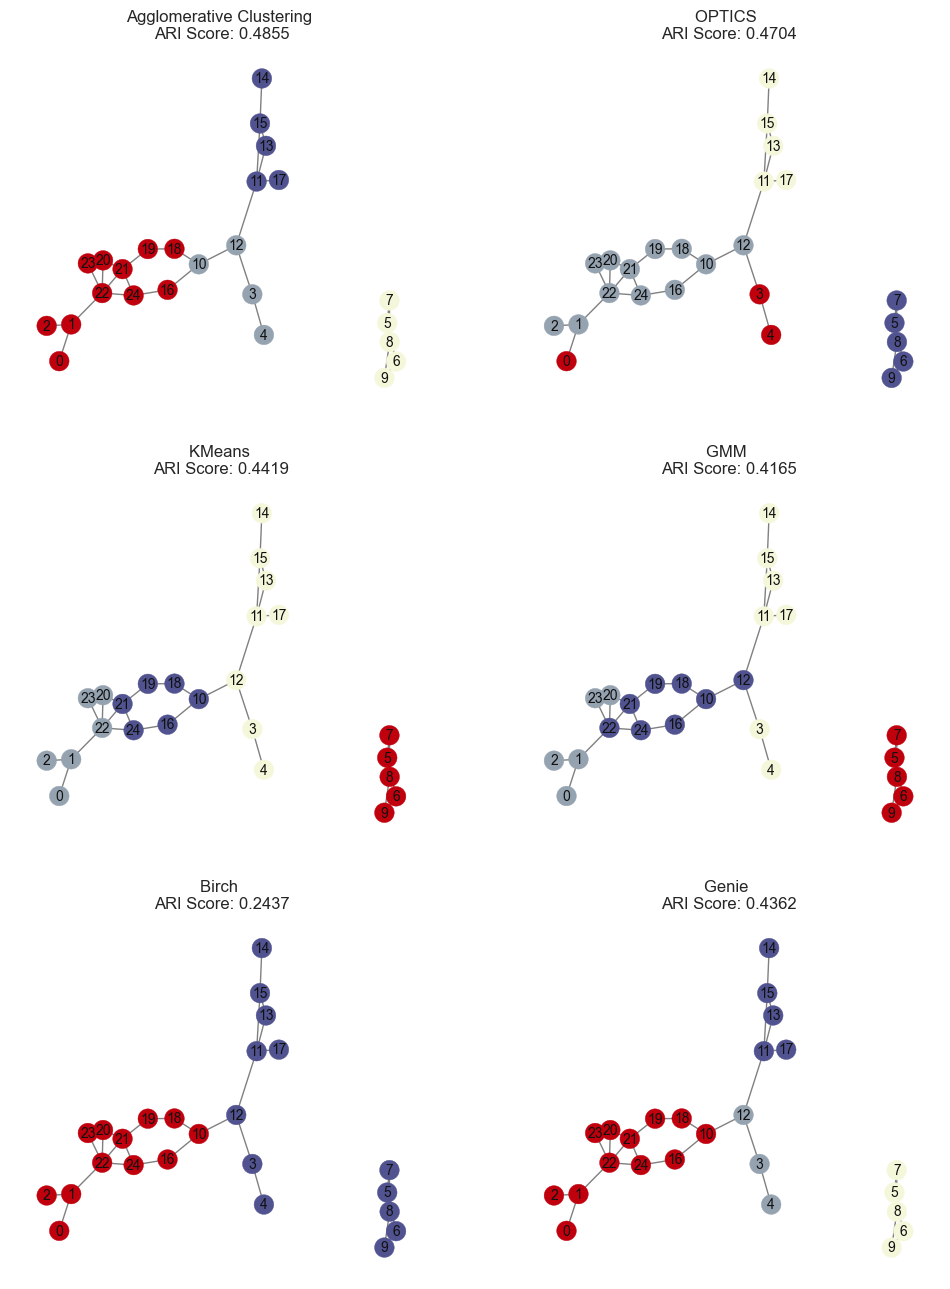

In [ ]:
mammalian_sighting_reflex = ['#C0000D','#95A3B1','#F5F7DA', '#515390']
from matplotlib.colors import ListedColormap
mammalian_sighting_reflex = ListedColormap(mammalian_sighting_reflex)
# def get_clustering_from_positions(posdf, best_num, true_labels)->dict:
fig, axes = plt.subplots(3, 2, figsize=(12, 16))
axes = axes.flatten()

#agglomerative clustering
ari_scores = {}
model = AgglomerativeClustering(n_clusters=best_num)
model.fit(posdf)
yhat = list(model.labels_)
ari_scores['AgglomerativeClustering'] = adjusted_rand_score(true_labels, yhat)
# Visualization
idx=0
ax = axes[idx]
ax.set_title(f"Agglomerative Clustering \nARI Score: {ari_scores['AgglomerativeClustering']:.4f}")
nx.draw(G, pos=pos, with_labels=True, node_color=yhat, cmap=mammalian_sighting_reflex, 
        edge_color='gray', node_size=200, font_size=10, ax=ax)


#DBscan
model = OPTICS()
model.fit(posdf)
yhat= list(model.labels_)
ari_scores['OPTICS'] = adjusted_rand_score(true_labels, yhat)

idx=1
ax = axes[idx]
ax.set_title(f"OPTICS \nARI Score: {ari_scores['OPTICS']:.4f}")
nx.draw(G, pos=pos, with_labels=True, node_color=yhat, cmap=mammalian_sighting_reflex, 
        edge_color='gray', node_size=200, font_size=10, ax=ax)

    # kmeans
model = KMeans(n_clusters=best_num, random_state=212)
# try:
model.fit(posdf)
yhat = list(model.predict(posdf))
ari_scores['KMeans'] = adjusted_rand_score(true_labels, yhat)

idx=2
ax = axes[idx]
ax.set_title(f"KMeans \nARI Score: {ari_scores['KMeans']:.4f}")
nx.draw(G, pos=pos, with_labels=True, node_color=yhat, cmap=mammalian_sighting_reflex, 
        edge_color='gray', node_size=200, font_size=10, ax=ax)
#GMM
#modeling
model = GaussianMixture(n_components=best_num, random_state=212)
# try:
model.fit(posdf)
yhat = list(model.predict(posdf))
ari_scores['GMM'] = adjusted_rand_score(true_labels, yhat)

idx=3
ax = axes[idx]
ax.set_title(f"GMM \nARI Score: {ari_scores['GMM']:.4f}")
nx.draw(G, pos=pos, with_labels=True, node_color=yhat, cmap=mammalian_sighting_reflex, 
        edge_color='gray', node_size=200, font_size=10, ax=ax)
#Birch
# print(best_num)
model = Birch(n_clusters=best_num)
# try:
model.fit(posdf)
yhat = list(model.predict(posdf))
# print(yhat)
ari_scores['BIRCH'] = adjusted_rand_score(true_labels, yhat)

idx=4
ax = axes[idx]
ax.set_title(f"Birch \nARI Score: {ari_scores['BIRCH']:.4f}")
nx.draw(G, pos=pos, with_labels=True, node_color=yhat, cmap=mammalian_sighting_reflex, 
        edge_color='gray', node_size=200, font_size=10, ax=ax)

# Genie
# try:
model = genieclust.Genie(n_clusters=best_num)
yhat = list(model.fit_predict(posdf))
ari_scores['Genie'] = adjusted_rand_score(true_labels, yhat)

idx=5
ax = axes[idx]
ax.set_title(f"Genie \nARI Score: {ari_scores['Genie']:.4f}")
nx.draw(G, pos=pos, with_labels=True, node_color=yhat, cmap=mammalian_sighting_reflex, 
        edge_color='gray', node_size=200, font_size=10, ax=ax)


In [240]:
ari_scores = {}

#@ GIRVAN NEWMAN
#separate tool to choose number of communities for girvan newman
partition = community.best_partition(G)
num_communities = len(set(partition.values()))

G1 = G.copy()

while nx.number_connected_components(G1) < num_communities:
    edge_centrality = nx.edge_betweenness_centrality(G1)
    max_edge = max(edge_centrality, key=edge_centrality.get)
    G1.remove_edge(*max_edge)

communities = list(nx.connected_components(G1))
list_comms_girvan = [i for i, com in enumerate(communities) for node in com]

ari_scores['Girvan Newman'] = adjusted_rand_score(true_labels, list_comms_girvan)
# scores[5] += adjusted_rand_score(true_labels, list_comms)

#@ LEIDEN
G_ig = ig.Graph.TupleList(nx.to_edgelist(G), directed=False)
missing_vertices = set(G.nodes()) - set(G_ig.vs['name'])
G_ig.add_vertices(list(missing_vertices))

resolutions = np.linspace(0.1, 1.5, 10)  # Adjust the range as needed
param_grid = {'resolution': resolutions}
grid = ParameterGrid(param_grid)

best_modularity = -np.inf
best_partition = None
for params in grid:
    partition = G_ig.community_leiden(objective_function="modularity", **params)
    modularity = G_ig.modularity(partition)
    if modularity > best_modularity:
        best_modularity = modularity
        best_partition = partition

list_comms_leiden = [i for i, com in enumerate(best_partition) for node in com]
ari_scores['Leiden'] = adjusted_rand_score(true_labels, list_comms_leiden)

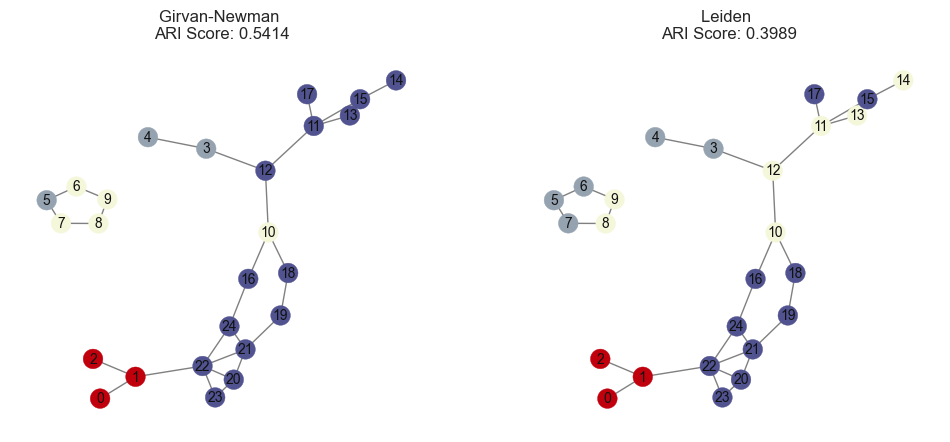

In [243]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes = axes.flatten()
idx=0
ax = axes[idx]
ax.set_title(f"Girvan-Newman \nARI Score: {ari_scores['Girvan Newman']:.4f}")
nx.draw(G, pos=pos, with_labels=True, node_color=list_comms_girvan, cmap=mammalian_sighting_reflex, 
        edge_color='gray', node_size=200, font_size=10, ax=ax)

idx=1
ax = axes[idx]
ax.set_title(f"Leiden \nARI Score: {ari_scores['Leiden']:.4f}")
nx.draw(G, pos=pos, with_labels=True, node_color=list_comms_leiden, cmap=mammalian_sighting_reflex, 
        edge_color='gray', node_size=200, font_size=10, ax=ax)

In [248]:
import pickle
import json
import networkx as nx


# Save the NetworkX graph object
# nx.write_gpickle(G, r'ploting\example_for_thesis\graph.gpickle')
with open(r'ploting\example_for_thesis\graph.pkl', 'wb') as f:
    pickle.dump(G, f)
    
# Save the positions dictionary
with open(rf'ploting\example_for_thesis\positions.pkl', 'wb') as f:
    pickle.dump(pos, f)

# Save the DataFrame
posdf.to_csv(rf'ploting\example_for_thesis\positions.csv', index=False)

# Archieve

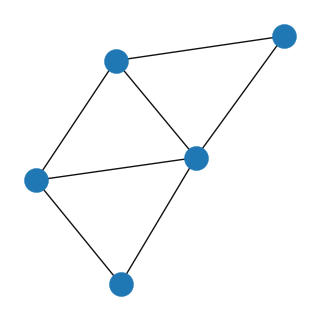

In [2]:
G = nx.erdos_renyi_graph(5, 0.5)
plt.figure(figsize=(3,3))
nx.draw(G)

In [3]:
posdf_from_layout(G, 'davidson_harel')

DAVIDSON HAREL
          X         Y
0 -1.000000  0.088011
1  0.635850  0.098713
2 -0.161348 -0.500977
3 -0.536980  1.000000
4  1.000000 -1.000000


,X,Y
0,-1.000000,0.088011
1,0.635850,0.098713
2,-0.161348,-0.500977
3,-0.536980,1.000000
4,1.000000,-1.000000
